In [ ]:
!which python

In [5]:
cat = !pwd

plot_directory = cat[0] +"/fro_lake/"

In [ ]:
ValueIteration?

In [ ]:
conda install pandas

In [6]:
import pandas as pd

In [7]:
import pandas as pd
from gym import wrappers
import time
import sys
import matplotlib.pyplot as plt
import numpy as np
import gym
from hiive.mdptoolbox.mdp import PolicyIteration, ValueIteration, QLearning, PolicyIterationModified

#https://medium.com/analytics-vidhya/solving-the-frozenlake-environment-from-openai-gym-using-value-iteration-5a078dffe438
def get_score(env, policy, episodes=100):
    misses = 0
    steps_list = []
    for episode in range(episodes):
        observation = env.reset()
        steps=0
        while True:
      
            action = policy[observation]
            observation, reward, done, _ = env.step(action)
            steps+=1
            if done and reward == 1:
                # print('You have got the fucking Frisbee after {} steps'.format(steps))
                steps_list.append(steps)
                break
            elif done and reward == 0:
                # print("You fell in a hole!")
                misses += 1
                break
    print('----------------------------------------------')
    print('You took an average of {:.0f} steps to get the frisbee'.format(np.mean(steps_list)))
    print('And you fell in the hole {:.2f} % of the times'.format((misses/episodes) * 100))
    print('----------------------------------------------')

def colors_lake():
	return {
		b'S': 'green',
		b'F': 'skyblue',
		b'H': 'black',
		b'G': 'gold',
	}

def directions_lake():
	return {
		3: '⬆',
		2: '➡',
		1: '⬇',
		0: '⬅'
	}


            
            
def create_numeric_transition_and_reward_matrix(env,actions,states):
    P = np.zeros((actions, states, states))
    R = np.zeros((states, actions))
    dict_transition = env.P
    states = dict_transition.keys()
    for state in states:
        for act in dict_transition[state]:
            for choice in dict_transition[state][act]:
                prob = choice[0]
                s_ = choice[1]
                reward = choice[2]
                P[act][state][s_] += prob
                R[state][act] += reward
    return P,R
            
                
        
def plot_policy(title, policy, map_desc, color_map, direction_map):
    fig = plt.figure()
    ax = fig.add_subplot(111, xlim=(0, policy.shape[1]), ylim=(0, policy.shape[0]))
    font_size = 'x-large'
    plt.title(title)
    for i in range(policy.shape[0]):
        for j in range(policy.shape[1]):
            y = policy.shape[0] - i - 1
            x = j
            p = plt.Rectangle([x, y], 1, 1)
            rectangle_color = color_map[map_desc[i, j]]
            p.set_facecolor(rectangle_color)
            ax.add_patch(p)
            if rectangle_color == 'gold':
                text = ax.text(x+0.5, y+0.5, "GOAL", weight='bold', size=font_size,
                           horizontalalignment='center', verticalalignment='center', color='w')
                
            elif rectangle_color == 'black':
                text = ax.text(x+0.5, y+0.5, "HOLE", weight='bold', size=font_size,
                           horizontalalignment='center', verticalalignment='center', color='w')
            
            
            else:
                text = ax.text(x+0.5, y+0.5, direction_map[policy[i, j]], weight='bold', size=font_size,
                           horizontalalignment='center', verticalalignment='center', color='w')
    plt.axis('off')
    plt.xlim((0, policy.shape[1]))
    plt.ylim((0, policy.shape[0]))
    plt.tight_layout()  






In [ ]:
Original Environment view
Environment view with optimal policy found
Relative reward vs environment complexity (PI ,VI, Q learning)
Time to solution vs environment complexity (PI, VI, Q learning)


In [ ]:
get_score(env, best_policy, episodes=1000)

## Value Iteration

In [ ]:
Reward (Utility) vs iterations
Reward (Utility) vs discount/gamma (PI, VI)
Time vs iterations
Time vs discount/gamma (PI, VI)
Delta convergence

## Set up env 

In [23]:
R.shape

(64, 4)

In [8]:
env = gym.make('FrozenLake8x8-v0')
env = env.unwrapped
desc = env.unwrapped.desc
P, R = create_numeric_transition_and_reward_matrix(env, 4,64)

In [36]:
#https://medium.com/analytics-vidhya/solving-the-frozenlake-environment-from-openai-gym-using-value-iteration-5a078dffe438
def get_score(env, policy, utility,  episodes=100):
    misses = 0
    steps_list = []
    reward_list = []
    
    for episode in range(episodes):
        observation = env.reset()
        steps=0
        utility_sum = 0 
        while True:
            action = policy[observation]
            utility_sum += utility[observation]
            observation, reward, done, _ = env.step(action)
            steps+=1
            if done and reward == 1:
                utility_sum += utility[observation]
                reward_list.append(utility_sum)
                steps_list.append(steps)
                break
            elif done and reward == 0:
                # print("You fell in a hole!")
                utility_sum += utility[observation]
                reward_list.append(utility_sum)
                misses += 1
                break
    print('----------------------------------------------')
    print('You took an average of {:.0f} steps to get the frisbee'.format(np.mean(steps_list)))
    print('And you fell in the hole {:.2f} % of the times'.format((misses/episodes) * 100))
    print('An average Utility of {0} per episode to get the for {1}'.format(np.mean(reward_list), episodes))
    print('An max Utility of {0} to get the for {1}'.format(np.amax(reward_list), episodes))
    print('----------------------------------------------')
    return misses, episodes, np.array(steps_list), np.array(reward_list)


In [ ]:
# plots needed 
Reward (Utility) vs iterations
Time vs iterations

Reward (Utility) vs discount/gamma (PI, VI)≈
Time vs discount/gamma (PI, VI)


In [52]:
np.linspace(0.1,1.,50)

array([0.1       , 0.11836735, 0.13673469, 0.15510204, 0.17346939,
       0.19183673, 0.21020408, 0.22857143, 0.24693878, 0.26530612,
       0.28367347, 0.30204082, 0.32040816, 0.33877551, 0.35714286,
       0.3755102 , 0.39387755, 0.4122449 , 0.43061224, 0.44897959,
       0.46734694, 0.48571429, 0.50408163, 0.52244898, 0.54081633,
       0.55918367, 0.57755102, 0.59591837, 0.61428571, 0.63265306,
       0.65102041, 0.66938776, 0.6877551 , 0.70612245, 0.7244898 ,
       0.74285714, 0.76122449, 0.77959184, 0.79795918, 0.81632653,
       0.83469388, 0.85306122, 0.87142857, 0.88979592, 0.90816327,
       0.92653061, 0.94489796, 0.96326531, 0.98163265, 1.        ])

In [47]:
np.amin(np.array(vi.error_mean))

0.12113834616041093

## helpers 

In [186]:
ValueIteration?

In [185]:
PolicyIterationModified?

In [222]:


def get_plot_data_vi(env, gamma_range ):
    iters = []
    times = []
    reward = [] 
    avg_error = []
    gamma = []
    goal_out_of_2000_runs = []
    avg_steps = []
    avg_cum_utility =[]
    max_cum_utility = []
    mean_reward = []
    util_ratio=[]
    for i,v in enumerate(gamma_range):
        P, R = create_numeric_transition_and_reward_matrix(env, 4,64)
        vi_temp= ValueIteration(P,R,v, epsilon= .01)
        vi_temp.run()
        iters.append(vi_temp.iter)
        times.append(vi_temp.time)
        reward.append(np.amax(vi_temp.V))
        avg_error.append(np.amin(np.array(vi_temp.error_mean)))
        gamma.append(v)
        misses, episodes, steps_list, reward_list = get_score(env, vi_temp.policy,vi_temp.V ,episodes=1000)
        goal_out_of_2000_runs.append((episodes-misses)/episodes )
        avg_steps.append(np.mean(steps_list))
        avg_cum_utility.append(np.mean(reward_list))
        max_cum_utility.append(np.amax(reward_list))
        mean_reward.append(np.mean(vi_temp.V))
        util_ratio.append(np.mean(reward_list)/np.amax(reward_list))
    columns =["Iterations", "Time", "Max_Reward", "Avg_error", "Gamma",
              "Success_ratio", 
              "avg_steps",
              "avg_cum_util", "max_average_utility", "Mean_Reward", "Utility_Ratio"]
    columns = [ "VI_{}".format(c) for c in columns]
    data = list(zip(iters,times,
                    reward,avg_error,
                    gamma,
                    goal_out_of_2000_runs,
                    avg_steps,
                    avg_cum_utility,
                    max_cum_utility,
                    mean_reward,
                    util_ratio))
    return pd.DataFrame(data,columns=columns)





def get_plot_data_pi(env, gamma_range ):
    iters = []
    times = []
    reward = [] 
    avg_error = []
    gamma = []
    goal_out_of_2000_runs = []
    avg_steps = []
    avg_cum_utility =[]
    max_cum_utility = []
    mean_reward = []
    util_ratio = []
    for i,v in enumerate(gamma_range):
        P, R = create_numeric_transition_and_reward_matrix(env, 4,64)
        vi_temp= PolicyIteration(P,R,v, max_iter=100)
        vi_temp.run()
        iters.append(vi_temp.iter)
        times.append(vi_temp.time)
        reward.append(np.amax(vi_temp.V))
        avg_error.append(np.amin(np.array(vi_temp.error_mean)))
        gamma.append(v)
        misses, episodes, steps_list, reward_list = get_score(env, vi_temp.policy,vi_temp.V ,episodes=300)
        goal_out_of_2000_runs.append((episodes-misses)/episodes )
        avg_steps.append(np.mean(steps_list))
        avg_cum_utility.append(np.mean(reward_list))
        max_cum_utility.append(np.amax(reward_list))
        mean_reward.append(np.mean(vi_temp.V))
        util_ratio.append(np.mean(reward_list)/np.amax(reward_list))
    columns =["Iterations", "Time", "Max_Reward", "Avg_error", "Gamma",
              "Success_ratio", 
              "avg_steps",
              "avg_cum_util", "max_average_utility", "Mean_Reward","Utility_Ratio"]
    columns = [ "PI_{}".format(c) for c in columns]
    data = list(zip(iters,times,
                    reward,avg_error,
                    gamma,
                    goal_out_of_2000_runs,
                    avg_steps,
                    avg_cum_utility,
                    max_cum_utility,
                     mean_reward,
                     util_ratio))
    return pd.DataFrame(data,columns=columns)

        
        
        
        
        
        
        
        
        
    

### Run Vi / PI 

In [293]:
problem = "fro_lake"
vi_plot_df = get_plot_data_vi(env, np.linspace(0.8,1.,10))
pi_plot_df = get_plot_data_pi(env, np.linspace(0.8,.9999999,10))

----------------------------------------------
You took an average of 85 steps to get the frisbee
And you fell in the hole 95.40 % of the times
An average Utility of 0.6087923113054892 per episode to get the for 1000
An max Utility of 44.04240832839891 to get the for 1000
----------------------------------------------
----------------------------------------------
You took an average of 84 steps to get the frisbee
And you fell in the hole 94.60 % of the times
An average Utility of 0.8427915570431712 per episode to get the for 1000
An max Utility of 32.73042090888901 to get the for 1000
----------------------------------------------
----------------------------------------------
You took an average of 79 steps to get the frisbee
And you fell in the hole 54.20 % of the times
An average Utility of 7.517126190355354 per episode to get the for 1000
An max Utility of 81.66103920940651 to get the for 1000
----------------------------------------------
-----------------------------------------

In [294]:
# stack horizontally 

vi_pi_df = pd.concat([vi_plot_df, pi_plot_df], axis=1) 

vi_pi_df.rename(columns={"VI_Gamma":"Gamma"}, inplace = True)




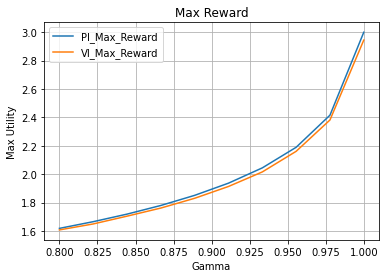

In [295]:

ax = vi_pi_df.plot(x="Gamma",
                   y=["PI_Max_Reward","VI_Max_Reward" ], title="Max Reward")
plt.grid()
ax.set_ylabel("Max Utility")

plt.savefig(f"{problem}_pi_vi_max_reward.png")



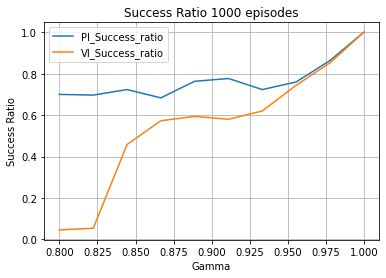

In [296]:
ax = vi_pi_df.plot(x="Gamma",
                   y=[ "PI_Success_ratio","VI_Success_ratio" ], title="Success Ratio 1000 episodes") 
plt.grid()
ax.set_ylabel("Success Ratio")

plt.savefig(f"{problem}_pi_vi_success_ratio.png")


In [228]:
vi_pi_df.columns

Index(['VI_Iterations', 'VI_Time', 'VI_Max_Reward', 'VI_Avg_error', 'Gamma',
       'VI_Success_ratio', 'VI_avg_steps', 'VI_avg_cum_util',
       'VI_max_average_utility', 'VI_Mean_Reward', 'VI_Utility_Ratio',
       'PI_Iterations', 'PI_Time', 'PI_Max_Reward', 'PI_Avg_error', 'PI_Gamma',
       'PI_Success_ratio', 'PI_avg_steps', 'PI_avg_cum_util',
       'PI_max_average_utility', 'PI_Mean_Reward', 'PI_Utility_Ratio'],
      dtype='object')

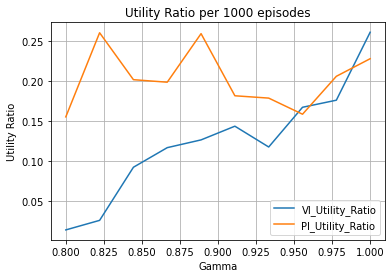

In [297]:
ax = vi_pi_df.plot(x="Gamma",
                   y=[ 'VI_Utility_Ratio','PI_Utility_Ratio' ], title="Utility Ratio per 1000 episodes") 
plt.grid()
ax.set_ylabel("Utility Ratio")
plt.savefig(f"{problem}_pi_vi_utility_ratio.png")

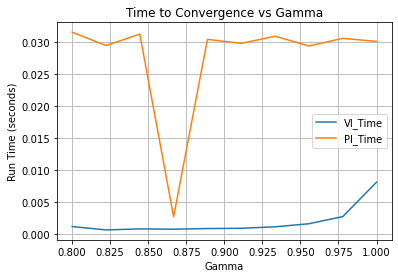

In [298]:
ax = vi_pi_df.plot(x="Gamma",
                   y=[ 'VI_Time','PI_Time' ], title="Time to Convergence vs Gamma") 
plt.grid()
ax.set_ylabel("Run Time (seconds)")
plt.savefig(f"{problem}_pi_vi_time_to_convergevs_gamma.png")

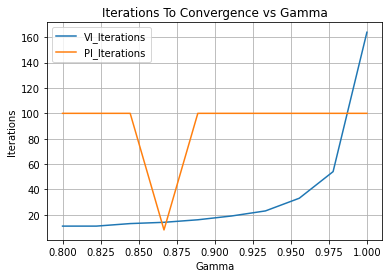

In [299]:
ax = vi_pi_df.plot(x="Gamma",
                   y=[ 'VI_Iterations','PI_Iterations' ], title="Iterations To Convergence vs Gamma") 
plt.grid()
ax.set_ylabel("Iterations")
plt.savefig(f"{problem}_pi_vi_iterations_to_conv_gamma.png")

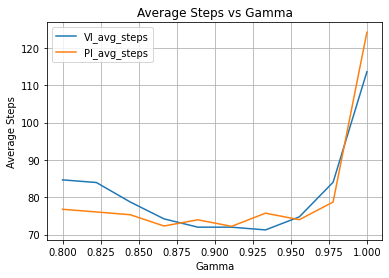

In [300]:
ax = vi_pi_df.plot(x="Gamma",
                   y=[ 'VI_avg_steps','PI_avg_steps' ], title="Average Steps vs Gamma") 
plt.grid()
ax.set_ylabel("Average Steps")
plt.savefig(f"{problem}_pi_vi_avg_steps_v_gamma.png")

In [ ]:
# plots needed 
Reward (Utility) vs iterations
Time vs iterations

Reward (Utility) vs discount/gamma (PI, VI)≈
Time vs discount/gamma (PI, VI)

## final run 

In [24]:
## 
P, R = create_numeric_transition_and_reward_matrix(env, 4,64)
pi = PolicyIteration(P,R,.99999,run_stat_frequency=True, max_iter=164)
pi_dict = pi.run()
pi_df = pd.DataFrame(pi_dict)
vi = ValueIteration(P,R,.99999,run_stat_frequency=True)
vi_dict = vi.run()
vi_df = pd.DataFrame(vi_dict)

In [25]:
pi_df

,State,Action,Reward,Error,Time,V[0],Max V,Mean V,Iteration
0,None,None,1.499993,4.999925e-01,0.022634,4.180807e-26,1.499993,0.052407,1
1,None,None,2.999400,7.418438e-01,0.023038,3.937188e-17,2.999400,0.704216,2
2,None,None,2.999400,4.612043e-01,0.023344,1.037195e+00,2.999400,1.278797,3
3,None,None,2.999400,8.816804e-02,0.023638,2.430169e+00,2.999400,1.792380,4
4,None,None,2.999400,4.685248e-02,0.023933,2.930751e+00,2.999400,1.987897,5
...,...,...,...,...,...,...,...,...,...
159,None,None,2.999400,1.465494e-14,0.069005,2.996524e+00,2.999400,2.026852,160
160,None,None,2.999400,2.775558e-15,0.069288,2.996524e+00,2.999400,2.026852,161
161,None,None,2.999400,8.881784e-16,0.069565,2.996524e+00,2.999400,2.026852,162
162,None,None,2.999400,7.771561e-16,0.069952,2.996524e+00,2.999400,2.026852,163


In [26]:
pi_df['VI Max V'] = vi_df.Reward
pi_df['PI Max V'] = pi_df.Reward

In [ ]:
#need_reward_vs_iterations 

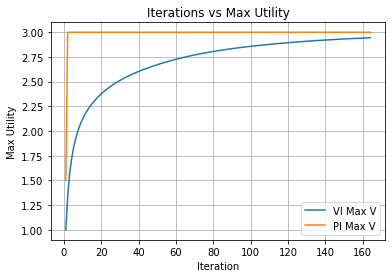

In [28]:
pi_df['VI Max V'] = vi_df.Reward
pi_df['PI Max V'] = pi_df.Reward
problem = "fro_lake"
pi_df['VI_Error'] = vi_df.Error
pi_df['PI_Error'] = pi_df.Error
ax = pi_df.plot(x="Iteration", y=['VI Max V', 'PI Max V'], title= "Iterations vs Max Utility")
plt.grid()
ax.set_ylabel("Max Utility")
plt.savefig(f"{problem}_pi_vi_iter_util.png")

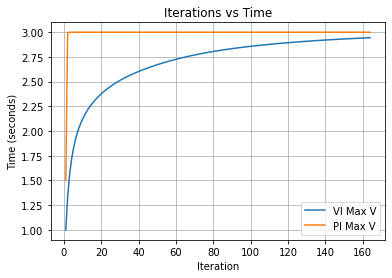

In [29]:
pi_df['VI Time'] = vi_df.Time
pi_df['PI Time'] = pi_df.Time
problem = "fro_lake"

ax = pi_df.plot(x="Iteration", y=['VI Max V', 'PI Max V'], title= "Iterations vs Time")
plt.grid()
ax.set_ylabel("Time (seconds)")
plt.savefig(f"{problem}_pi_vi_iter_time.png")

In [1]:
pi_df['VI_Error'] = vi_df.Error
pi_df['PI_Error'] = pi_df.Error
ax = pi_df.plot(x="Iteration", y=["VI_Error", "PI_Error"], title= "Convergence Over Iterations")
plt.grid()
ax.set_ylabel("Error")
plt.savefig(f"{problem}_pi_vi_convergence_over_iter.png")

NameError: name 'pi_df' is not defined

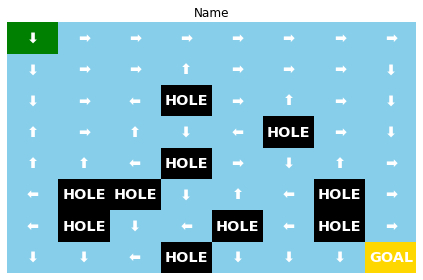

In [8]:
env = env.unwrapped
desc = env.unwrapped.desc
plot = plot_policy('Name',np.array(vi.policy).reshape(8,8),desc,colors_lake(),directions_lake())

## Policy Iteration 

In [ ]:
Reward (Utility) vs iterations
Reward (Utility) vs discount/gamma (PI, VI)≈
Time vs iterations
Time vs discount/gamma (PI, VI)

In [9]:
P, R = create_numeric_transition_and_reward_matrix(env, 4,64)
pi = PolicyIteration(P,R,.9,run_stat_frequency=True, max_iter=1000)
pi_dict = pi.run()
pi_df = pd.DataFrame(pi_dict)

In [ ]:
pd.DataFrame(pi_dict)

In [ ]:
len(pi.error_mean)

In [150]:
pi_plot_df.rename(columns = )

,Iterations,Time,Max_Reward,Avg_error,Gamma,Success_ratio,avg_steps,avg_cum_util,max_average_utility,Mean_Reward
0,1000,0.302549,1.617996,2.220446e-16,0.800000,0.645,76.072868,10.185328,68.355203,0.097198
1,1000,0.300838,1.665226,2.220446e-16,0.822222,0.718,71.529248,11.573062,64.836606,0.106272
2,1000,0.285065,1.718489,1.110223e-16,0.844444,0.709,77.775740,14.337343,87.334584,0.117863
3,8,0.002342,1.779491,7.848937e-02,0.866667,0.678,75.856932,15.974770,117.016154,0.133284
4,1000,0.290196,1.850807,1.387779e-16,0.888889,0.742,73.377358,19.803907,112.011748,0.154959
5,1000,0.284274,1.936614,2.220446e-16,0.911111,0.730,75.973973,25.620717,143.400398,0.187758
6,1000,0.286738,2.044366,2.220446e-16,0.933333,0.759,76.495389,33.355832,194.087230,0.242701
7,1000,0.285379,2.189405,3.685940e-16,0.955555,0.747,75.846051,47.806356,231.611344,0.349274
8,1000,0.292354,2.415613,1.026956e-15,0.977778,0.865,84.624277,92.633064,535.773352,0.614698
9,1000,0.286605,2.999994,6.994405e-15,1.000000,1.000,114.511000,343.530255,1412.989378,2.028956


In [ ]:
# plots needed 
Reward (Utility) vs epsilon (Q learning)
Reward (Utility) vs epsilon decay (Q learning)
Reward (Utility) vs alpha (Q learning)
Time vs iterations




In [34]:
def get_plot_data_qi_epsilon(env, gamma_range ):
    iters = []
    times = []
    reward = [] 
    avg_error = []
    epsilon = []
    goal_out_of_2000_runs = []
    avg_steps = []
    avg_cum_utility =[]
    max_cum_utility = []
    mean_reward = []
    util_ratio=[]
    for i,v in enumerate(gamma_range):
        P, R = create_numeric_transition_and_reward_matrix(env, 4,64)
        vi_temp= QLearning(P,R,gamma=0.99, epsilon=v, n_iter=1000000)
        vi_temp.run()
        iters.append(i)
        times.append(vi_temp.time)
        reward.append(np.amax(vi_temp.V))
        avg_error.append(np.amin(np.array(vi_temp.error_mean)))
        epsilon.append(v)
        misses, episodes, steps_list, reward_list = get_score(env, vi_temp.policy,vi_temp.V ,episodes=1000)
        goal_out_of_2000_runs.append((episodes-misses)/episodes )
        avg_steps.append(np.mean(steps_list))
        avg_cum_utility.append(np.mean(reward_list))
        max_cum_utility.append(np.amax(reward_list))
        mean_reward.append(np.mean(vi_temp.V))
        util_ratio.append(np.mean(reward_list)/np.amax(reward_list))
    columns =["Iterations", "Time", "Max_Reward", "Avg_error", "epsilon",
              "Success_ratio", 
              "avg_steps",
              "avg_cum_util", "max_average_utility", "Mean_Reward", "Utility_Ratio"]
    columns = [ "Q_{}".format(c) for c in columns]
    data = list(zip(iters,times,
                    reward,avg_error,
                    epsilon,
                    goal_out_of_2000_runs,
                    avg_steps,
                    avg_cum_utility,
                    max_cum_utility,
                    mean_reward,
                    util_ratio))
    return pd.DataFrame(data,columns=columns)


def get_plot_data_qi_epsilon_decay(env, gamma_range ):
    iters = []
    times = []
    reward = [] 
    avg_error = []
    epsilon = []
    goal_out_of_2000_runs = []
    avg_steps = []
    avg_cum_utility =[]
    max_cum_utility = []
    mean_reward = []
    util_ratio=[]
    for i,v in enumerate(gamma_range):
        P, R = create_numeric_transition_and_reward_matrix(env, 4,64)
        vi_temp= QLearning(P,R,gamma=0.99, epsilon_decay=v, n_iter=1000000)
        vi_temp.run()
        iters.append(i)
        times.append(vi_temp.time)
        reward.append(np.amax(vi_temp.V))
        avg_error.append(np.amin(np.array(vi_temp.error_mean)))
        epsilon.append(v)
        misses, episodes, steps_list, reward_list = get_score(env, vi_temp.policy,vi_temp.V ,episodes=1000)
        goal_out_of_2000_runs.append((episodes-misses)/episodes )
        avg_steps.append(np.mean(steps_list))
        avg_cum_utility.append(np.mean(reward_list))
        max_cum_utility.append(np.amax(reward_list))
        mean_reward.append(np.mean(vi_temp.V))
        util_ratio.append(np.mean(reward_list)/np.amax(reward_list))
    columns =["Iterations", "Time", "Max_Reward", "Avg_error", "epsilon_decay",
              "Success_ratio", 
              "avg_steps",
              "avg_cum_util", "max_average_utility", "Mean_Reward", "Utility_Ratio"]
    columns = [ "Q_{}".format(c) for c in columns]
    data = list(zip(iters,times,
                    reward,avg_error,
                    epsilon,
                    goal_out_of_2000_runs,
                    avg_steps,
                    avg_cum_utility,
                    max_cum_utility,
                    mean_reward,
                    util_ratio))
    return pd.DataFrame(data,columns=columns)

def get_plot_data_qi_alpha(env, gamma_range ):
    iters = []
    times = []
    reward = [] 
    avg_error = []
    epsilon = []
    goal_out_of_2000_runs = []
    avg_steps = []
    avg_cum_utility =[]
    max_cum_utility = []
    mean_reward = []
    util_ratio=[]
    for i,v in enumerate(gamma_range):
        P, R = create_numeric_transition_and_reward_matrix(env, 4,64)
        vi_temp= QLearning(P,R,gamma=0.99, alpha=v, n_iter=1000000)
        vi_temp.run()
        iters.append(i)
        times.append(vi_temp.time)
        reward.append(np.amax(vi_temp.V))
        avg_error.append(np.amin(np.array(vi_temp.error_mean)))
        epsilon.append(v)
        misses, episodes, steps_list, reward_list = get_score(env, vi_temp.policy,vi_temp.V ,episodes=1000)
        goal_out_of_2000_runs.append((episodes-misses)/episodes )
        avg_steps.append(np.mean(steps_list))
        avg_cum_utility.append(np.mean(reward_list))
        max_cum_utility.append(np.amax(reward_list))
        mean_reward.append(np.mean(vi_temp.V))
        util_ratio.append(np.mean(reward_list)/np.amax(reward_list))
    columns =["Iterations", "Time", "Max_Reward", "Avg_error", "Alpha",
              "Success_ratio", 
              "avg_steps",
              "avg_cum_util", "max_average_utility", "Mean_Reward", "Utility_Ratio"]
    columns = [ "Q_{}".format(c) for c in columns]
    data = list(zip(iters,times,
                    reward,avg_error,
                    epsilon,
                    goal_out_of_2000_runs,
                    avg_steps,
                    avg_cum_utility,
                    max_cum_utility,
                    mean_reward,
                    util_ratio))
    return pd.DataFrame(data,columns=columns)

In [307]:
QLearning?

In [ ]:
QLearning(
    transitions,
    reward,
    gamma,
    alpha=0.1,
    alpha_decay=0.99,
    alpha_min=0.001,
    epsilon=1.0,
    epsilon_min=0.1,
    epsilon_decay=0.99,
    n_iter=10000,
    skip_check=False,
    iter_callback=None,
    run_stat_frequency=None,
)

In [38]:
qi_plot_df_alpha = get_plot_data_qi_alpha(env, np.linspace(0.001,1.,10))
qi_plot_df_epsilon = get_plot_data_qi_epsilon(env, np.linspace(0.1,1.,10))
qi_plot_df_epsilon_decay = get_plot_data_qi_epsilon_decay(env, np.linspace(0.1,1.,10))




----------------------------------------------
You took an average of 102 steps to get the frisbee
And you fell in the hole 98.10 % of the times
An average Utility of 0.032033446260929854 per episode to get the for 1000
An max Utility of 0.8986530621378161 to get the for 1000
----------------------------------------------
----------------------------------------------
You took an average of 75 steps to get the frisbee
And you fell in the hole 99.30 % of the times
An average Utility of 0.00784125628027941 per episode to get the for 1000
An max Utility of 1.1746146285906651 to get the for 1000
----------------------------------------------
----------------------------------------------
You took an average of 86 steps to get the frisbee
And you fell in the hole 99.70 % of the times
An average Utility of 0.004520731323939968 per episode to get the for 1000
An max Utility of 0.899376774046539 to get the for 1000
----------------------------------------------
--------------------------------

----------------------------------------------
You took an average of 57 steps to get the frisbee
And you fell in the hole 99.40 % of the times
An average Utility of 0.007693525455975051 per episode to get the for 1000
An max Utility of 1.4157644558690152 to get the for 1000
----------------------------------------------
----------------------------------------------
You took an average of 97 steps to get the frisbee
And you fell in the hole 97.50 % of the times
An average Utility of 0.0689762272296827 per episode to get the for 1000
An max Utility of 1.796678380924986 to get the for 1000
----------------------------------------------
----------------------------------------------
You took an average of 43 steps to get the frisbee
And you fell in the hole 99.60 % of the times
An average Utility of 0.009367627098739572 per episode to get the for 1000
An max Utility of 0.8113029772358542 to get the for 1000
----------------------------------------------
----------------------------------

In [37]:
get_score?

In [389]:
qi_plot_df_epsilon_decay

,Iterations,Time,Max_Reward,Avg_error,epsilon,Success_ratio,avg_steps,avg_cum_util,max_average_utility,Mean_Reward,Utility_Ratio
0,0,45.915255,0.432041,1.349205e-07,0.1,0.007,77.428571,0.014898,2.022901,0.013408,0.007365
1,1,45.494153,0.412725,9.880397e-12,0.2,0.010,52.000000,0.012235,1.817517,0.013136,0.006732
2,2,45.494260,0.436553,1.001147e-07,0.3,0.018,71.000000,0.033416,1.062864,0.014813,0.031440
3,3,44.380840,0.374105,1.058395e-09,0.4,0.003,72.666667,0.009251,0.906030,0.012529,0.010211
4,4,43.741882,0.449347,3.097006e-10,0.5,0.003,38.000000,0.007983,2.900303,0.014262,0.002753
5,5,47.703624,0.400489,2.949180e-10,0.6,0.019,94.684211,0.033594,1.696940,0.013290,0.019797
6,6,45.881277,0.426231,0.000000e+00,0.7,0.015,67.133333,0.031388,1.997762,0.014941,0.015712
7,7,44.994651,0.370824,2.199819e-10,0.8,0.011,79.909091,0.017836,0.914493,0.011988,0.019503
8,8,44.987732,0.536391,6.800895e-09,0.9,0.006,57.666667,0.018788,5.294282,0.015686,0.003549
9,9,49.579299,0.125165,9.581623e-09,1.0,0.154,64.376623,0.059930,0.650342,0.003754,0.092152


In [ ]:
# plots needed 
Reward (Utility) vs epsilon (Q learning)
Reward (Utility) vs epsilon decay (Q learning)
Reward (Utility) vs alpha (Q learning)
Time vs iterations
Reward vs Iterations

In [387]:
[c.replace("VI_","")for c in qi_plot_df_alpha.columns]

['Iterations',
 'Time',
 'Max_Reward',
 'Avg_error',
 'epsilon',
 'Success_ratio',
 'avg_steps',
 'avg_cum_util',
 'max_average_utility',
 'Mean_Reward',
 'Utility_Ratio']

In [384]:
qi_plot_df_alpha.columns = [c.replace("VI_","")for c in qi_plot_df_epsilon.columns]
qi_plot_df_epsilon_decay.columns = [c.replace("VI_","")for c in qi_plot_df_epsilon.columns]
qi_plot_df_epsilon.columns =[c.replace("VI_","")for c in qi_plot_df_epsilon.columns]

In [392]:
qi_plot_df_alpha.rename(columns={"epsilon":"Alpha"}, inplace = True)

In [393]:
qi_plot_df_epsilon_decay.rename(columns={"epsilon":"epsilon_decay"}, inplace = True)

In [396]:
qi_plot_df_alpha.columns

Index(['Iterations', 'Time', 'Max_Reward', 'Avg_error', 'Alpha',
       'Success_ratio', 'avg_steps', 'avg_cum_util', 'max_average_utility',
       'Mean_Reward', 'Utility_Ratio'],
      dtype='object')

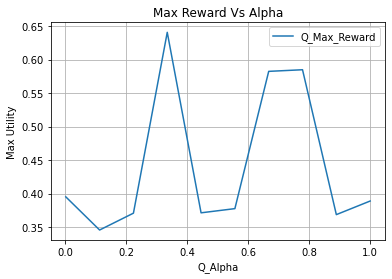

In [49]:
ax = qi_plot_df_alpha.plot(x="Q_Alpha", y="Q_Max_Reward", title="Max Reward Vs Alpha")
ax.set_ylabel("Max Utility")
plt.grid()
plt.savefig("fro_lake_max_reward_vs_alpha.png");

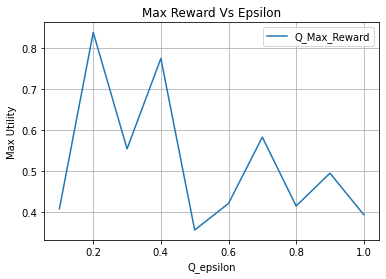

In [63]:
ax = qi_plot_df_epsilon.plot(x="Q_epsilon", y="Q_Max_Reward", title="Max Reward Vs Epsilon")
ax.set_ylabel("Max Utility")
plt.grid()
plt.savefig("fro_lake_avg_utility_vs_epsilon2.png");

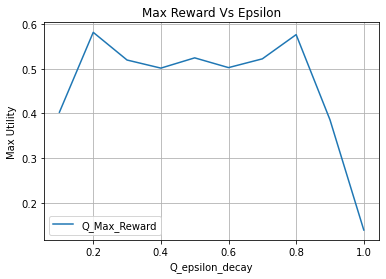

In [51]:
ax = qi_plot_df_epsilon_decay.plot(x="Q_epsilon_decay", y="Q_Max_Reward", title="Max Reward Vs Epsilon")
ax.set_ylabel("Max Utility")
plt.grid()
plt.savefig("fro_lake_avg_utility_vs_epsilon_decay.png");

Frozen Lake 8x8 Q-Learning
----------------------------------------------
You took an average of 61 steps to get the frisbee
And you fell in the hole 97.70 % of the times
An average Utility of 2.3865234807513893 per episode to get the for 1000
An max Utility of 22.80143375419099 to get the for 1000
----------------------------------------------


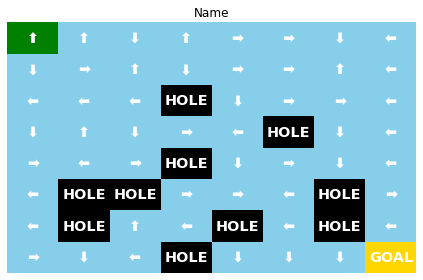

In [376]:
print('Frozen Lake 8x8 Q-Learning')
P, R = create_numeric_transition_and_reward_matrix(env, 4,64)
q = QLearning(P, R, gamma=0.99 ,alpha = 0.223 , epsilon=0.7, epsilon_decay = 0.99,n_iter=10000000,run_stat_frequency=True)
q_dict = q.run()
q_df = pd.DataFrame(q_dict)
misses, episodes, steps_list, reward_list =get_score(env, q.policy,q.V, episodes=1000)
plot = plot_policy('Name',np.array(q.policy).reshape(8,8),desc,colors_lake(),directions_lake())


### Save Optimal Policies

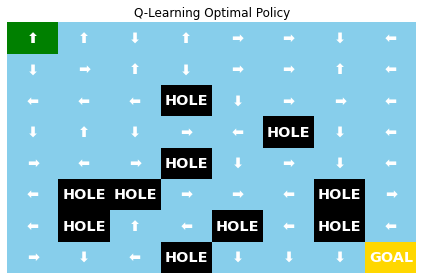

In [377]:
plot = plot_policy('Q-Learning Optimal Policy',np.array(q.policy).reshape(8,8),desc,colors_lake(),directions_lake())
plt.savefig("Q_optimal_fro_lake.png")

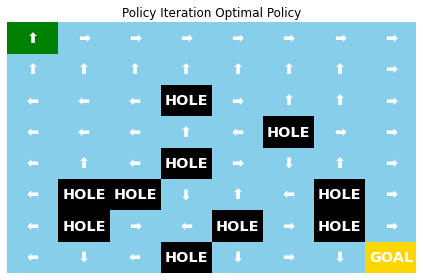

In [435]:
plot = plot_policy('Policy Iteration Optimal Policy',np.array(pi.policy).reshape(8,8),desc,colors_lake(),directions_lake())
plt.savefig("PI_optimal_fro_lake.png")

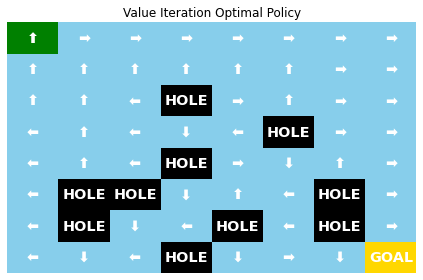

In [436]:
plot = plot_policy('Value Iteration Optimal Policy',np.array(vi.policy).reshape(8,8),desc,colors_lake(),directions_lake())
plt.savefig("VI_optimal_fro_lake.png")

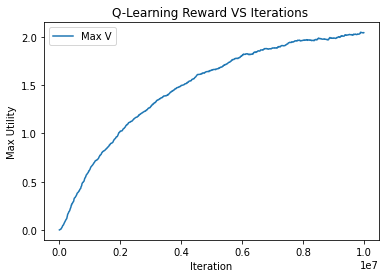

In [432]:
ax = q_df.iloc[::10000,:].plot(x="Iteration", y="Max V", title="Q-Learning Reward VS Iterations ")
ax.plot()
ax.set_ylabel("Max Utility")
plt.savefig("fro_q_max_v_vs_itret.png")

In [57]:
def plot_policy_init(title, policy, map_desc, color_map, direction_map):
    fig = plt.figure()
    ax = fig.add_subplot(111, xlim=(0, policy.shape[1]), ylim=(0, policy.shape[0]))
    font_size = 'x-large'
    plt.title(title)
    for i in range(policy.shape[0]):
        for j in range(policy.shape[1]):
            y = policy.shape[0] - i - 1
            x = j
            p = plt.Rectangle([x, y], 1, 1)
            rectangle_color = color_map[map_desc[i, j]]
            p.set_facecolor(rectangle_color)
            ax.add_patch(p)
            if rectangle_color == 'gold':
                text = ax.text(x+0.5, y+0.5, "GOAL", weight='bold', size=font_size,
                           horizontalalignment='center', verticalalignment='center', color='w')
                
            elif rectangle_color == 'black':
                text = ax.text(x+0.5, y+0.5, "HOLE", weight='bold', size=font_size,
                           horizontalalignment='center', verticalalignment='center', color='w')
            
            
            elif rectangle_color == 'green':
                text = ax.text(x+0.5, y+0.5, "START", weight='bold', size=font_size,
                           horizontalalignment='center', verticalalignment='center', color='w')
                
            else:
                text = ax.text(x+0.5, y+0.5, "ICE", weight='bold', size=font_size,
                           horizontalalignment='center', verticalalignment='center', color='w')
                
    plt.axis('off')
    plt.xlim((0, policy.shape[1]))
    plt.ylim((0, policy.shape[0]))
    plt.tight_layout()  

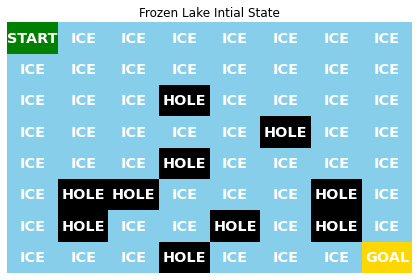

In [60]:
plot = plot_policy_init('Frozen Lake Intial State',np.array(vi.policy).reshape(8,8),desc,colors_lake(),directions_lake())
plt.savefig("init_fro_lake.png")

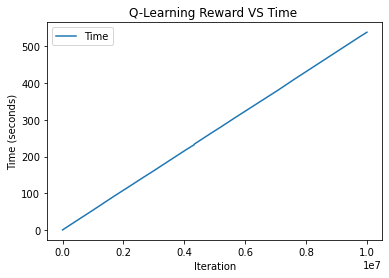

In [430]:
ax = q_df.iloc[::10000,:].plot(x="Iteration", y="Time", title="Q-Learning Reward VS Time ")
ax.set_ylabel("Time (seconds)")

plt.savefig("fro_q_max_v_vs_time.png")

# Environment Complexity 
* Original Env 
* Optimal Policy
* Relative reward vs environment complexity (PI ,VI, Q learning)
* Time to solution vs environment complexity (PI, VI, Q learning)


In [53]:
env.render()

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [56]:
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [55]:
env.reset()

0

In [61]:
QLearning?

In [64]:
misses, episodes, steps_list, reward_list =get_score(env, vi.policy,vi.V, episodes=1000)

----------------------------------------------
You took an average of 111 steps to get the frisbee
And you fell in the hole 0.40 % of the times
An average Utility of 303.8337178095731 per episode to get the for 1000
An max Utility of 1998.771841194018 to get the for 1000
----------------------------------------------


In [65]:
misses, episodes, steps_list, reward_list =get_score(env, pi.policy,pi.V, episodes=1000)

----------------------------------------------
You took an average of 118 steps to get the frisbee
And you fell in the hole 0.00 % of the times
An average Utility of 354.9288864764775 per episode to get the for 1000
An max Utility of 1603.7699956865347 to get the for 1000
----------------------------------------------
